## We Rate Dogs (Data Wrangling)

A data wrangling project by Ugwu Paulinus. U as  part of  Udacity's Data Analysis Nanodegree - DAND sponsored by ALX-T

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gather">Gathering Data</a></li>
<li><a href="#Access">Accessing Data</a></li>
<li><a href="#Clean">Cleaning Data</a></li>
<li><a href="#Store">Storing Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project makes claim on majorly data wrangling as part of Udacity's Data Analysis Nanodegree (DAND). It applies skills on gathering, accessing, cleaning and storing of data as part of the wrangling workflow.

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

This data would also be analysed with exploratory data analysis to communicate possible insights derived from the data.

The dataset that is used  is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
# importing the necessary functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import time
import os
import zipfile
import requests
from datetime import datetime
%matplotlib inline

<a id='Gather'></a>
### Gathering Data
Here, we will gather 3 pieces of data as described below:

<ol>
<li>The WeRateDogs Twitter archive: This file was given by Udacity directly in the downloadable format </li>

<li>The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.This file image_predictions.tsv is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv </li>

<li>Each tweet's retweet count and favorite ("like") count. This can be gathered from the WeRateDogs Twitter archive, by querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. But for some reasoj at the time of writing this project, i have not yet registered as a twitter developer, so an alternative file is given by udacity and can be downloaded via this link. </li>
</ol>

1. Loading the <mark> twitter_archive_enhanced.csv </mark>  file

In [2]:
archive = pd.read_csv("twitter-archive-enhanced-2.csv")

In [3]:
# viewing the first five rows of the df_twitter_enhanced dataframe
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- downloading the image prediction file programmatically

In [4]:
# downloading the image prediction file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# writing the image prediction file (image-predictions.tsv)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Loading the image prediction file in a pandas data frame

prediction = pd.read_csv("image-predictions.tsv", sep  = "\t")

In [7]:
# Viewing the image prediction file
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Loading the Additional twitter data provided from udacity's page 

In [8]:
# extracting tweet_ids from the f_twitter_enhanced data frame
tweet_ids = archive['tweet_id']

In [9]:
# viewing the tweet_ids
tweet_ids.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

This codes reads the tweet_json file given from udacity and extracts the needed information 
(favourite count and retweet count)

In [10]:
#the following codes creates empty lists
#for variables we want to creat
new_tweet_id = []
favourite_count = []
retweet_count = []
errors = []
# This code opens the tweet_json file provided from udacity and reads it
with open("tweet_json", "r") as file:
    for line in file: # a for loop for each line in the file
        tweet = json.loads(line) # coverts in line from a json string to a python dict
        for tweet_id in tweet_ids: # creates a for loop that iterates through the tweet id in twitter_enhanced df
            # This codes appends wanted info's if tweet_id is in the tweet_json file provided by udacity and produces an error df if not
            if tweet_id == tweet['id']:
                favourite_count.append(tweet['favorite_count'])
                retweet_count.append(tweet['retweet_count'])
                new_tweet_id.append(tweet_id)
    # creating a dictionary to contain all gathered info from tweet_json
    df = {'tweet_id': new_tweet_id, "favourite_count":favourite_count, "retweet_count": retweet_count}
    
        
        

        


In [11]:
more_data = pd.DataFrame(df)

In [12]:
more_data.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a id=Access></a>
### Accessing Data.
In this session, Data was accessed both visually and programmatically for quality and tidyness issues.
<p>The quality of data talk about problems on the contents of the data. Problems of missing values(completeness), validity, accuracy and consistency.
<p>Tidiness is accessed with regard to the structural requirements as given by Hadley Wickham.


- Visual Assesment

In [13]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


NOTES
- The name column has some invalid values like "a", and also contains some missing values
- The dog names are seperated into four columns
- There are redundant dog classes columns (doggo, floofer, pupper, puppo)

In [14]:
#acessing the image prediction data
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
# acessing the additional data
more_data

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


- Programmatic Asessment.

In [16]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### NOTES
- There are only 181 retweets
- There are only 78 replies.
- The timestamp column is in string format
- Expanded url's has 2297 non-missing rows

In [17]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### NOTES
- there are some rating denominator that is not 10
- the maximum value for both rating denominator is beyond what is expected

In [18]:
# code that shows 
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### NOTES
- There are some rating denominators that are not ten
- most of them are multiples of 10

In [19]:
# code that queries the rows with rating denominator not equal to 10
archive.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,None,None
26,886983233522544640,NaN,NaN,2017-07-17 16:17:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
344,832032802820481025,NaN,NaN,2017-02-16 01:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo,None,None,None


Accessing the image prediction dataframe

In [22]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
sum(prediction.duplicated())

0

## Asessment Summary

### Data Quality Issues

- timestamp contain wrong data types
- tweet_id's should be a string data types
- Rating denominator contains some values that are not 10
- There are some invalid values for name column like 'a', "an"
- The rows in source columns contains lots of details
- Rating numerator has values that are beyond expected etc 1776
- There are 181 retweets and 78 reply tweets`.
- There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

### Tidiness

- There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".
-  When all rating_denominators are the same (10) this column is no longer needed.
- The retweet  and reply columns would no longer be needed after necessary cleaning is made
- The needed columns are pushed to the right end corner of the table which makes visibility straneous 



### Clean Data

In [25]:
# making a copy of the data
archive_clean = archive.copy(deep = True)
predictions_clean = prediction.copy(deep = True)
more_data_clean = more_data.copy(deep = True)

### data quality 1
- timestamp contain wrong data types

### Define
- Convert time_stamp variable from object to date time

### Code

In [26]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

### Test

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### data quality 
- tweet id should be a string data type

### Define
- convert tweet id from int to string

### code

In [28]:
#archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

### Test


In [29]:
archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue

 There are 181 retweets and 78 reply tweets. We would work with only the original tweets

### Define
 Remove all observations in the archive_clean dataset that have values in the rows in_reply_to_status_id or retweeted_status_id. Then remove those two columns plus retweeted_status_user_id, retweeted_status_timestamp and in_reply_to_user_id

### Code

In [30]:
# code that queries the archive_clean data frame on rows without values in the in_reply_to_status_id column
archive_clean = archive_clean[(archive_clean['in_reply_to_status_id'].isna() == True)  & (archive_clean['retweeted_status_id'].isna() == True)]


In [31]:
# code that drops all necessary columns stated above
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp'],
                            axis = 1)

### Test

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Quality Issue
- Rating denominator contains some values that are not 10

### Define
- Remove all rows that have rating denominators outside of 10

### Code

In [33]:
archive_clean = archive_clean.query('rating_denominator == 10')

### Test

In [34]:
archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue
- There are some invalid values for name column like 'a', "an"

### Define
- Get the wrong list of names and use for loops to assign None to them

### Code

In [35]:
# get a list of all the indexes of the wrong names
wrong_list = list(archive_clean.query("name=='a' or name == 'an'").index)
# Iterate through this list and replace all with none
for i in wrong_list:
    archive_clean['name'][i] = "None"

<ipython-input-35-fabd47d00a5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['name'][i] = "None"


### Test

In [36]:
for i in wrong_list:
    if archive_clean['name'][i] != "None":
        print("Dog name is incorrect!!!")

## Tidiness issues

There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

### Define
- convert the four columns (“doggo”, “flooter”, “pupper”, “puppo”) into one “stage” column
- then drop the four columns.

### Code

In [37]:
# This code assigns the index of each dog stages to their corresponding names
doggo = list(archive_clean.query('doggo == "doggo"').index)
puppo = list(archive_clean.query('puppo == "puppo"').index)
floofer = list(archive_clean.query('floofer == "floofer"').index)
pupper = list(archive_clean.query('pupper == "pupper"').index)


In [38]:
# creates an empty new colunm called dog stage
archive_clean['dog_stage'] = np.nan

In [39]:
archive_clean['dog_stage'][pupper] = "pupper"
archive_clean['dog_stage'][doggo] = "doggo"
archive_clean['dog_stage'][puppo] = "puppo"
archive_clean['dog_stage'][floofer] = "floofer"

<ipython-input-39-5740a0f400d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['dog_stage'][pupper] = "pupper"
<ipython-input-39-5740a0f400d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['dog_stage'][doggo] = "doggo"
<ipython-input-39-5740a0f400d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['dog_stage'][puppo] = "puppo"
<ipython-input-39-5740a0f400d8>:4: SettingWithCopyWarning: 
A 

In [40]:
# this code drops the redundant dog stages.
archive_clean.drop(['floofer', 'puppo', 'pupper', 'doggo'], inplace = True, axis = 1)

### Test

In [41]:
archive_clean['dog_stage'].value_counts()

pupper     221
doggo       81
puppo       24
floofer     10
Name: dog_stage, dtype: int64

### Quality
- Rating numerator has values that are beyond expected etc 1776

### Define
- Check the nmerators that are in anomaly and drop them if they are not much

In [42]:
# checking the value counts of each numerator
archive_clean['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

We observe that the last 6 numbers are absurd ratings. we would drop them

In [43]:
archive_clean = archive_clean.query('rating_numerator < 15')

### Test

In [44]:
archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Tidiness Issues
When all rating_denominators are the same (10) this column is no longer needed.

### Define
- Drop the rating_denominator column.
- Rename the rating_numerator column to be rating.

### Code

In [45]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

### Test

In [46]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'dog_stage']

### Tidiness Issues
- The needed columns are pushed to the right end corner of the table which makes visibility straneous 

### Define
- shift the last four columns to the first four columns of the table

### Code

In [47]:
temp = archive_clean.columns.tolist()
new_col = temp[-3:] + temp[1:5]
new_col.insert(0, "tweet_id")
archive_clean = archive_clean[new_col]

### Test

In [48]:
archive_clean.head()

,tweet_id,rating,name,dog_stage,timestamp,source,text,expanded_urls
0,892420643555336193,13,Phineas,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,13,Tilly,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,12,Archie,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,13,Darla,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,12,Franklin,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...


### Note
Data on tweets and the additional data would be added together for easy acessing and avoidance of redundancy

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2075 non-null   int64              
 1   rating         2075 non-null   int64              
 2   name           2075 non-null   object             
 3   dog_stage      335 non-null    object             
 4   timestamp      2075 non-null   datetime64[ns, UTC]
 5   source         2075 non-null   object             
 6   text           2075 non-null   object             
 7   expanded_urls  2072 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 145.9+ KB


In [50]:
more_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favourite_count  2354 non-null   int64
 2   retweet_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [51]:

tweets = archive_clean.merge(more_data_clean, how = 'left', on = 'tweet_id')

In [52]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2075 non-null   int64              
 1   rating           2075 non-null   int64              
 2   name             2075 non-null   object             
 3   dog_stage        335 non-null    object             
 4   timestamp        2075 non-null   datetime64[ns, UTC]
 5   source           2075 non-null   object             
 6   text             2075 non-null   object             
 7   expanded_urls    2072 non-null   object             
 8   favourite_count  2075 non-null   int64              
 9   retweet_count    2075 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 178.3+ KB


<a id='Store'></a>
## Storing Data

The following codes stores the tweets and prediction data sets

In [53]:
tweets.to_csv('tweets_master.csv', sep = ',', index = False)

This comes the end of the data wrangling process. data was not expected to be thoroughly clean, but just clean enough for analyses to be done.

<a id='eda'></a>
## Exploratory Data Analysis.

After data has been cleaned, some basic analysis would be done to draw insights from data. The following questions would be addressed in the analysis process

- Is there a significant relationship between retweets and reactions
- Which type of dogs got the highest retweet counts and favorite counts?
- What dog stage receives the best ratings?
- Which are the most common dog stage?

In [54]:
# importiing tweets master
tweets_master = pd.read_csv("tweets_master.csv")

In [ ]:
Question 1:
Is there a significant relationship between retweets and reactions

In [59]:
# extracting retweets and favourite counts columns
retweets = tweets_master.query("retweet_count != 'None'")['retweet_count']
likes = tweets_master.query('favourite_count != "None"')['favourite_count']

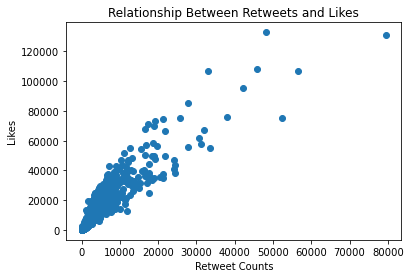

In [60]:
# ploting a scatter plot of favourite count against retweet counts\
plt.scatter(x = retweets,  y = likes)
# customisation
plt.xlabel("Retweet Counts")
plt.ylabel("Likes")
plt.title("Relationship Between Retweets and Likes")
plt.show()

The above plot gives us a picture of a linear relationship between Retweets and Likes

Further test would make us see if this relationship is truly significantly linear

In [61]:
import scipy.stats # imports scipy package

scipy.stats.pearsonr(x=retweets, y=likes) # returns pearsons correlation coefficient and its p-value

(0.9112815859147756, 0.0)

In [64]:
scipy.stats.spearmanr(retweets, likes) # spearmans correlation

SpearmanrResult(correlation=0.9676053295841264, pvalue=0.0)

The above results shows high and strong positive linearity with p-value less than 0.05

### Question 2:
Which type of dogs got the highest retweet counts and favorite counts?

In [67]:
# gets the mean value of each dog stage for the favourite count and retweet count
bar_data = tweets_master.groupby('dog_stage')['retweet_count', 'favourite_count'].mean()

<ipython-input-67-afdd235093e4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bar_data = tweets_master.groupby('dog_stage')['retweet_count', 'favourite_count'].mean()


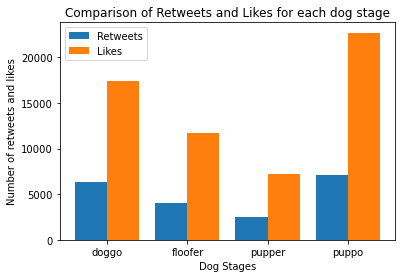

In [68]:
# assigns the values to retweet count(x) and favourite count(y)
x , y = bar_data['retweet_count'].tolist() , bar_data['favourite_count'].tolist()
stages = ['doggo','floofer','pupper','puppo'] # stages of the dogs

X_axis = np.arange(len(stages))
#To avoid overlapping of bars in each group, 
# the bars are shifted -0.2 units and +0.2 units from the X-axis.
plt.bar(X_axis - 0.2, x, 0.4, label = 'Retweets')
plt.bar(X_axis + 0.2, y, 0.4, label = 'Likes')

# plot customization
plt.xticks(X_axis, stages)
plt.xlabel("Dog Stages")
plt.ylabel("Number of retweets and likes")
plt.title("Comparison of Retweets and Likes for each dog stage")
plt.legend()
plt.show()

It is seen that the number of likes for the puppo is the highest. while in general they get more likes than retweets

### Question 3:
What dog stage receives the best ratings?

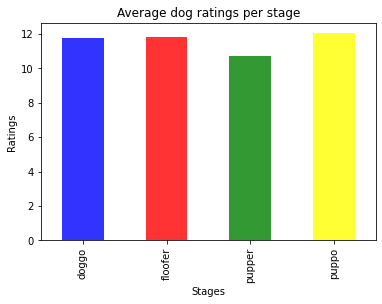

In [70]:
rate_data = tweets_master.groupby('dog_stage')['rating'].mean() # gets the mean rating of each dog stage
colors = ["blue", "red", "green", "yellow"] # assigns color to each bar
rate_data.plot(kind = "bar", title = "Average dog ratings per stage", alpha = 0.8, color = colors)
# plot customization
plt.xlabel("Stages")
plt.ylabel("Ratings")
plt.show()

it is observed that the dog stage with the lowest rating is the pupper while other no significant difference in ratings can be observed for other stages

### Question 4:
which is the most common dog stage?

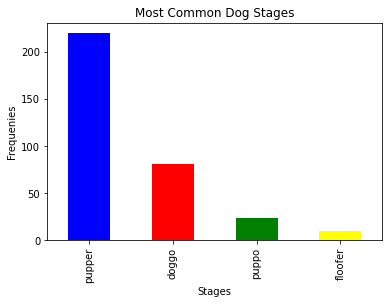

In [74]:
common_data = tweets_master['dog_stage'].value_counts()
common_data.plot(kind = 'bar', title = 'Most Common Dog Stages', color = colors)
# plot customization
plt.xlabel("Stages")
plt.ylabel("Frequenies")
plt.show()

it is observed that pupper is the most common dog stage!!!

<a id='reference'></a>
## References
- Ways to convert intergers to strings <a href = "https://www.geeksforgeeks.org/fastest-way-to-convert-integers-to-strings-in-pandas-dataframe/"> fastest-way-to-convert-integers-to-strings-in-pandas-dataframe </a>
- How to extract words from strings <a href = "https://stackoverflow.com/questions/45318065/extract-the-word-from-string-using-regex"> extract-the-word-from-string-using-regex </a>
- How to join dataframes together <a href = "https://www.journaldev.com/33398/pandas-melt-unmelt-pivot-function#:~:text=Pandas%20melt()%20function%20is,two%20columns%20%E2%80%93%20variable%20and%20value."> pandas-melt-unmelt-pivot-function </a>
- how to add new column to a data frame <a href = https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/> adding-new-column-to-existing-dataframe-in-pandas </a>
- We rate dogs Udacity project by Bernardo Romero <a href = https://github.com/bromero26/we-rate-dogs> A Data-Wrangling project by Bernardo Romero as part of Udacity's Data Analysis Nanodegree - DAND </a>
- Multiple Bar Charts <a href = https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/> plotting-multiple-bar-charts-using-matplotlib </a>
- We rate dogs analysis <a href = https://towardsdatascience.com/data-analysis-project-weratedogs-16aad3f6c8c2> Data Analysis Project by John Chen (Yueh-Han) </a>
- Data analysis project <a href = https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb> Wrangle and Analyse Data by Stephanie Anderton </a>